#  Анализ выручки, прибыли и сезонности продаж за 2024 год

###  Цель проекта

Целью данного анализа является выявление ключевых закономерностей в продажах за 2024 год: сезонности, прибыльности по категориям, каналам продаж и динамики показателей во времени. Это поможет:

- Понять, какие категории и каналы приносят наибольшую прибыль;
- Выявить пики и падения спроса в течение года;
- Принять стратегические решения для роста выручки и оптимизации расходов.

Данные содержат информацию о заказах (дата, категория товара, канал продаж, количество, цена, выручка, себестоимость и прибыль).

In [2]:
#загрузка файла
from google.colab import files
uploaded = files.upload()

Saving financial_sales_data.csv to financial_sales_data.csv


In [3]:
#Импорт библиотек и загрузка данных. Проверка базы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("financial_sales_data.csv")
df.head()

,order_id,order_date,category,channel,units_sold,unit_price,revenue,cost,profit
0,ORD10000,2024-04-12,Home,Online,8,498.485517,3987.884137,2754.723605,1233.160532
1,ORD10001,2024-12-14,Clothing,Online,1,99.891677,99.891677,72.897003,26.994674
2,ORD10002,2024-09-27,Books,Retail,2,301.129513,602.259026,315.441563,286.817462
3,ORD10003,2024-04-16,Clothing,Online,7,211.573540,1481.014780,761.415637,719.599143
4,ORD10004,2024-03-12,Beauty,Retail,4,71.929347,287.717388,145.537357,142.180031


In [4]:
#Просмотр базовой информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    1200 non-null   object 
 1   order_date  1200 non-null   object 
 2   category    1200 non-null   object 
 3   channel     1200 non-null   object 
 4   units_sold  1200 non-null   int64  
 5   unit_price  1200 non-null   float64
 6   revenue     1200 non-null   float64
 7   cost        1200 non-null   float64
 8   profit      1200 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 84.5+ KB


In [5]:
#Проверка на пропущенные значения
df.isnull().sum()

,0
order_id,0
order_date,0
category,0
channel,0
units_sold,0
unit_price,0
revenue,0
cost,0
profit,0


In [6]:
# Проверка, что категориальные данные адекватны
print("Категории товаров:", df['category'].unique())
print("Каналы продаж:", df['channel'].unique())

Категории товаров: ['Home' 'Clothing' 'Books' 'Beauty' 'Electronics']
Каналы продаж: ['Online' 'Retail']


In [7]:
# Перевод колонки order_date в date time ,и проверка на покрывает ли дата нужный диапазон
df['order_date'] = pd.to_datetime(df['order_date'])
print("Диапазон дат:", df['order_date'].min(), "–", df['order_date'].max())

Диапазон дат: 2024-01-01 00:00:00 – 2024-12-31 00:00:00


In [8]:
# Проверка есть ли отрицательные значения в числовых колонках и поиск строк с отрицательным количеством или прибылью
numeric_cols = ['units_sold', 'unit_price', 'revenue', 'cost', 'profit']
print(df[numeric_cols].describe())


print(df[df['units_sold'] <= 0])
print(df[df['profit'] < 0])  # Убытки — могут быть, но проверим

        units_sold   unit_price      revenue         cost       profit
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000
mean      4.994167   252.038819  1256.034271   812.038954   443.995317
std       2.566701   140.486382  1009.605615   668.033190   384.646551
min       1.000000    10.091399    10.805441     7.720158     3.085283
25%       3.000000   134.137666   400.143420   254.081914   138.628618
50%       5.000000   249.402563   966.561006   618.717123   346.668829
75%       7.000000   373.863684  1887.328907  1238.441111   636.553892
max       9.000000   498.783884  4484.854544  3376.573333  2238.783575
Empty DataFrame
Columns: [order_id, order_date, category, channel, units_sold, unit_price, revenue, cost, profit]
Index: []
Empty DataFrame
Columns: [order_id, order_date, category, channel, units_sold, unit_price, revenue, cost, profit]
Index: []


In [9]:
# Есть ли дубли по колонке order_id
df.duplicated(subset='order_id').sum()

np.int64(0)

## 🧼 Проверка и очистка данных

- Датасет содержит **1200 записей**, каждая строка представляет отдельный заказ.
- Пропущенные значения отсутствуют.
- Категориальные признаки **category** и **channel** содержат ожидаемые значения:
  - Категории: **Home**, **Clothing**, **Books**, **Beauty**, **Electronics**
  - Каналы продаж: **Online**, **Retail**
- Диапазон дат: **2024-01-01 — 2024-12-31**, охватывает полный календарный год.
- Дубликатов по **order_id** не обнаружено.
- Отрицательных значений в **units_sold**, **revenue**, **cost** или **profit** — **нет**.
- Распределение числовых переменных (объём, цена, прибыль) — **реалистичное**, без выбросов или аномалий.


 Данные пригодны для дальнейшего анализа и визуализации.

## Динамика выручки и прибыли по месяцам

Посмотрим, как менялись ключевые финансовые метрики по месяцам. Это поможет выявить сезонность и понять, в какие периоды бизнес был наиболее активен или, наоборот, проседал.

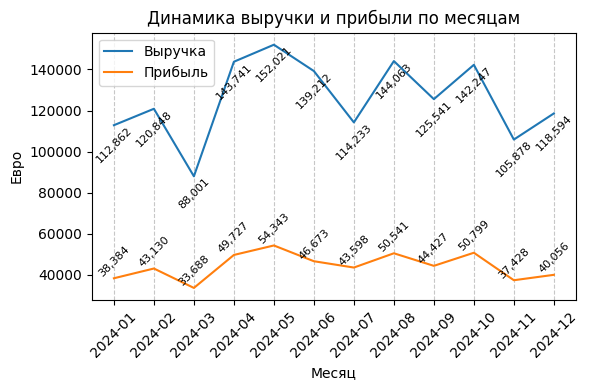

In [19]:
#Динамика выручки и прибыли по месяцам

df['month'] = df['order_date'].dt.to_period('M').astype(str)
mon_stats = df.groupby('month').agg({'revenue': 'sum', 'profit': 'sum', 'order_id': 'count'}) \
              .rename(columns={'order_id': 'orders'}).reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(data=mon_stats, x='month', y='revenue', label='Выручка')
sns.lineplot(data=mon_stats, x='month', y='profit', label='Прибыль')


for i in range(len(mon_stats)):
    plt.text(mon_stats['month'][i], mon_stats['revenue'][i], f"{mon_stats['revenue'][i]:,.0f}",
             color='black', fontsize=8, ha='center', va='top', rotation=45)
    plt.text(mon_stats['month'][i], mon_stats['profit'][i], f"{mon_stats['profit'][i]:,.0f}",
             color='black', fontsize=8, ha='center', va='bottom', rotation=45)

plt.xticks(rotation=45)
plt.title('Динамика выручки и прибыли по месяцам')
plt.ylabel('Евро')
plt.xlabel('Месяц')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Выручка и прибыль по месяцам**

**Максимальная выручка** была достигнута в мае 2024 года — 152 021 Евро, при этом прибыль составила 54 343 Евро.

**Вторая по объему выручка** — август (144 063 Евро) и апрель (143 741 Евро), что говорит о сезонной активности во 2-м квартале и конце лета.

**Наименьшая выручка** наблюдалась в марте (88 001 Евро), а также в январе и ноябре (примерно по 105–113 тыс. евро).

**Тренд:** наблюдается рост в 1-м полугодии, пик — **май**, после чего значения колеблются.

###  Количество проданных единиц по месяцам

Анализ продаж в физических единицах позволяет понять, есть ли зависимости от сезона — даже если выручка стабильна, может изменяться объём продаж (например, из-за скидок или изменения среднего чека).

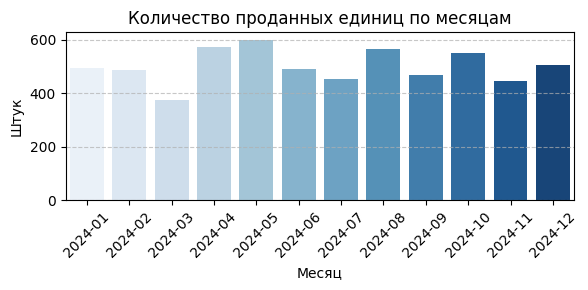

In [20]:
# Количество проданных единиц по месяцам
mon_units = df.groupby('month')['units_sold'].sum().reset_index()

plt.figure(figsize=(6,3))
sns.barplot(data=mon_units, x='month', y='units_sold', hue='month', palette='Blues', legend=False)
plt.xticks(rotation=45)
plt.title('Количество проданных единиц по месяцам')
plt.ylabel('Штук')
plt.xlabel('Месяц')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Объем продаж (единиц товара)**

**Максимальные продажи** (в штуках) зафиксированы также в мае — **597** единиц.

**Значимые объемы** были в апреле (**571**), августе (**564**) и октябре (**550**).

**Наименьшее количество продаж** — в марте (**375** шт.) и июле (**451** шт.).

**Вывод:**

**Май** уверенно лидирует как по выручке, так и по физическому объему продаж, что может быть связано с сезонными акциями или пиковым спросом.

### Средний чек и маржинальность по месяцам


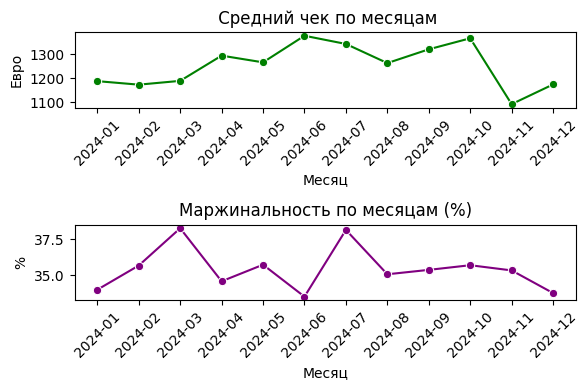

In [22]:
#Средний чек и маржинальность по месяцам
mon_stats['avg_check'] = mon_stats['revenue'] / mon_stats['orders']
mon_stats['margin'] = mon_stats['profit'] / mon_stats['revenue'] * 100

fig, ax = plt.subplots(2, 1, figsize=(6,4))

sns.lineplot(data=mon_stats, x='month', y='avg_check', ax=ax[0], marker='o', color='green')
ax[0].set_title(' Средний чек по месяцам')
ax[0].set_ylabel('Евро')
ax[0].set_xlabel('Месяц')#plt.xlabel('Месяц')

sns.lineplot(data=mon_stats, x='month', y='margin', ax=ax[1], marker='o', color='purple')
ax[1].set_title('Маржинальность по месяцам (%)')
ax[1].set_ylabel('%')
ax[1].set_xlabel('Месяц')#plt.xlabel('Месяц')

for axis in ax:
    axis.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Средний чек и маржинальность**

**Средний чек выше** всего в июне — **1378** евро, также высокие значения в октябре (**1367** евро) и июле (**1343** евро).

**Самый низкий средний чек** — в ноябре (**1091** евро) и феврале (**1173** евро).

**Маржинальность** была наивысшей в **марте** — **38.3%**, несмотря на наименьшую выручку. Это указывает на высокий удельный доход с продажи.

**Июнь** и **декабрь** — месяцы с наименьшей маржинальностью (около **33.5%**), что может свидетельствовать о скидках, распродажах или повышенной себестоимости.

**Общий вывод по динамике месяцев**

**Май** — наиболее успешный месяц по ключевым метрикам: выручке, прибыли и объему продаж.

**Март** показал отличную маржинальность при низкой выручке — возможно, были реализованы дорогие и маржинальные товары.

**Наблюдается цикличность:** выручка растет к лету и повторно в осенние месяцы, а в начале и в конце года проседает.

## Выручка и прибыль по категориям товаров

Оценим, какие товарные категории приносят наибольшую выручку и прибыль. Это поможет выделить наиболее эффективные направления и понять, на что стоит делать ставку.

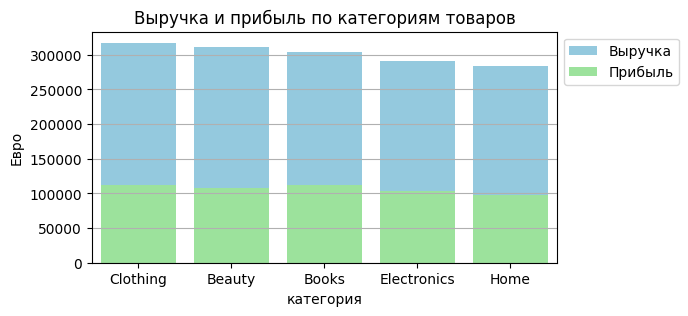

In [29]:
#Выручка и прибыль по категориям товаров
category_stats = df.groupby('category').agg({'revenue': 'sum', 'profit': 'sum', 'units_sold': 'sum'}).reset_index().sort_values('revenue', ascending=False)

plt.figure(figsize=(6,3))
sns.barplot(data=category_stats, x='category', y='revenue', color='skyblue', label='Выручка')
sns.barplot(data=category_stats, x='category', y='profit', color='lightgreen', label='Прибыль')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Выручка и прибыль по категориям товаров')
plt.ylabel('Евро')
plt.xlabel('категория')
plt.grid(axis='y', linestyle='-', alpha=1)
#plt.tight_layout()
plt.show()

**Наблюдения:**

Лидером по выручке выступает категория **Clothing** (Одежда) — 317,265 евро, за ней следуют **Beauty** (Косметика) — 310,822 евро и **Books** (Книги) — 304,396 евро.

**Прибыль** также наибольшая у **Books** (111,977 евро) и **Clothing** (111,887 евро), несмотря на разницу в выручке.

**Вывод:** прибыль распределяется неравномерно — высокая выручка не всегда означает максимальную прибыль. Возможно, наценка или себестоимость варьируются по категориям.

###Средняя маржа по категориям в процентах

Важно не только сколько продаётся, но и насколько это выгодно. Анализ средней маржинальности по категориям позволяет выявить прибыльные ниши, даже если они не лидируют по объёму продаж.

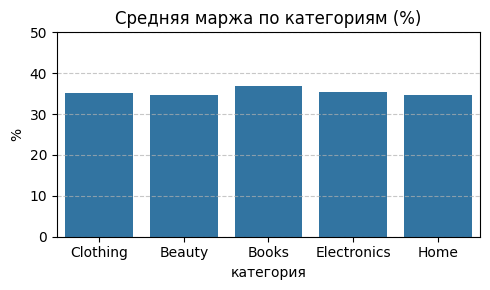

In [25]:
#Средняя маржа по категориям в процентах
category_stats['margin_%'] = category_stats['profit'] / category_stats['revenue'] * 100

plt.figure(figsize=(5,3))
sns.barplot(data=category_stats, x='category', y='margin_%')
plt.title('Средняя маржа по категориям (%)')
plt.ylabel('%')
plt.xlabel('категория')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

**Средняя маржинальность в роцентах по категориям**

Наибольшую маржу показывает категория **Books** — **36.8%**, что свидетельствует о высокой рентабельности при умеренной выручке.

**Остальные** категории имеют маржу в пределах **34.5–35.4%**, что говорит о стабильной, но менее выгодной модели.

**Вывод:** категория **Books** — наиболее эффективная по соотношению прибыль/выручка. Это может быть связано с низкими затратами на производство/доставку. Так же возможно некоторые книги продаются в электронном виде.

### Количество проданных единиц по категориям

Сравним объёмы продаж в физических единицах по категориям. Это даёт представление о спросе на разные типы товаров вне зависимости от их цены.

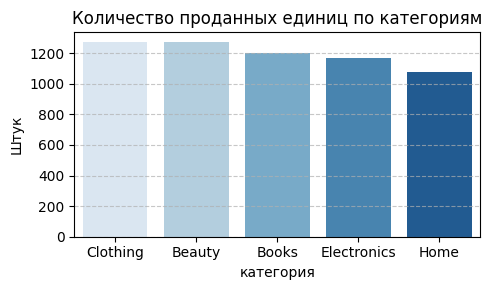

In [26]:
#Количество проданных единиц по категориям
plt.figure(figsize=(5,3))
sns.barplot(data=category_stats, x='category', y='units_sold', hue='category', palette='Blues', dodge=False, legend=False)
plt.title('Количество проданных единиц по категориям')
plt.ylabel('Штук')
plt.xlabel('категория')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Наблюдения:**

**Наибольшее количество** проданных единиц — у категорий **Clothing** и **Beauty** (по 1,272 штук каждая), далее идут **Books** (1,202).

Несмотря на одинаковое число проданных единиц у **Clothing** и **Beauty**, у **Clothing** выручка и прибыль выше → цена продажи выше или издержки ниже.

Вывод: **Clothing** — не только массовая, но и прибыльная категория. **Beauty** — массовая, но менее рентабельная по сравнению.

**Общий вывод по категориям:**


- **Books**	- Самая рентабельная (высокая маржа)
- **Clothing**	- Лидер по выручке и объемам, хорошая прибыль
- **Beauty**	- Массовая, но немного менее маржинальная
- **Electronics/Home**	- Наименее сильные по всем метрикам

## Онлайн vs Ритейл: сравнение по прибыли, выручке и числу заказов

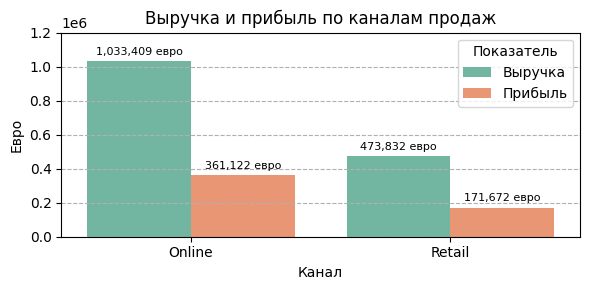

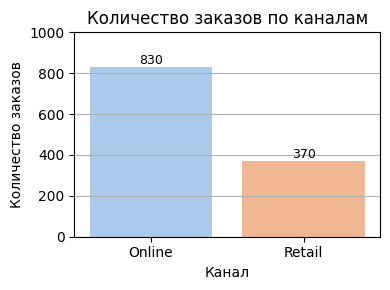

In [54]:
# Создание графика "Выручка и прибыль по каналам продаж"
channel_stats = df.groupby('channel').agg({'revenue': 'sum','profit': 'sum','order_id': 'nunique'}).reset_index().rename(columns={'order_id': 'orders'})

channel_stats = channel_stats.sort_values('revenue', ascending=False)

melted = channel_stats.melt(id_vars='channel', value_vars=['revenue', 'profit'])
melted['variable'] = melted['variable'].map({'revenue': 'Выручка', 'profit': 'Прибыль'})

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=melted, x='channel', y='value', hue='variable', palette='Set2')
ax.legend(title="Показатель")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:,.0f} евро', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8, color='black')

plt.title('Выручка и прибыль по каналам продаж')
plt.ylabel('Евро')
plt.xlabel('Канал')
plt.ylim(0, 1200000)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


plt.figure(figsize=(4, 3))
axx1 = sns.barplot(data=channel_stats, x='channel', y='orders', hue=channel_stats.index, palette='pastel', legend = False)
for bar in axx1.patches:
    height = bar.get_height()
    axx1.annotate(f'{height:,.0f}', (bar.get_x() + bar.get_width() / 2., height), ha='center', va='bottom', fontsize=9, color='black')

plt.title('Количество заказов по каналам')
plt.ylabel('Количество заказов')
plt.xlabel('Канал')
plt.ylim(0, 1000)
plt.tight_layout()
plt.grid(axis="y")
plt.show()


**Наблюдения:**

**Online:**

- Выручка: 1 033 409 евро

- Прибыль: 361 122 евро

- Количество заказов: 830

**Retail:**

- Выручка: 473 832 евро

- Прибыль: 171 672 евро

- Количество заказов: 370

**Вывод:**

Канал **Online** обеспечивает **69%** всей выручки компании и в **2.2** раза превышает офлайн по прибыли.

Количество заказов в **онлайне** также выше: **830** против **370** — это говорит о более высокой активности покупателей в этом канале.

Однако **Retail** остаётся значимым, несмотря на меньший объём: он приносит стабильную прибыль и может иметь стратегическую ценность (например, как витрина бренда).

## Средний чек и средняя маржинальность по каналам

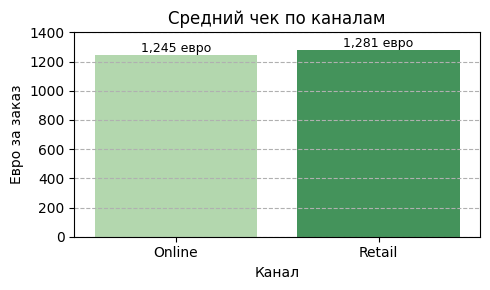

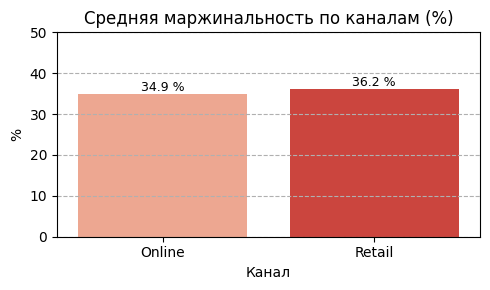

In [56]:
# Создание графика "Средний чек по каналам"
orders_by_channel = df.groupby('channel')['order_id'].nunique()
revenue_by_channel = df.groupby('channel')['revenue'].sum()
profit_by_channel = df.groupby('channel')['profit'].sum()

channel_stats['avg_check'] = (revenue_by_channel / orders_by_channel).values
channel_stats['avg_margin_%'] = (profit_by_channel / revenue_by_channel * 100).values


plt.figure(figsize=(5, 3))
axx3 = sns.barplot(data=channel_stats, x='channel', y='avg_check', hue=channel_stats.index, palette='Greens', legend = False)

for bar in axx3.patches:
    height = bar.get_height()
    axx3.annotate(f'{height:,.0f} евро', (bar.get_x() + bar.get_width() / 2., height), ha='center', va='bottom', fontsize=9, color='black')

plt.title('Средний чек по каналам')
plt.ylabel('Евро за заказ')
plt.xlabel('Канал')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.ylim(0, 1400)
plt.tight_layout()
plt.show()

# Создание графика "Средняя маржинальность по каналам (%)"
plt.figure(figsize=(5, 3))
axx5 = sns.barplot(data=channel_stats, x='channel', y='avg_margin_%', hue=channel_stats.index, palette='Reds', legend = False)

for bar in axx5.patches:
    height = bar.get_height()
    axx5.annotate(f'{height:,.1f} %', (bar.get_x() + bar.get_width() / 2., height), ha='center', va='bottom', fontsize=9, color='black')

plt.title('Средняя маржинальность по каналам (%)')
plt.ylabel('%')
plt.xlabel('Канал')
plt.ylim(0, 50)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


**Вывод:**

**Retail** показывает более высокий средний чек — 1 281 евро против 1 245 евро в онлайне. Вероятно, в офлайне чаще совершают покупки с более высокой суммой.

**Маржинальность** в розничном канале также выше — **36.2%**, что говорит о лучшей рентабельности этих продаж.

Несмотря на меньший масштаб, розничный канал работает эффективнее с точки зрения прибыли на каждый евро выручки.

**Итоговый вывод по каналам продаж**

**Онлайн-канал** является ключевым источником дохода: более половины всех заказов и почти **70%** выручки.

**Розничный канал** демонстрирует более качественные метрики: выше и чек, и маржа, что указывает на его устойчивость и важность для поддержания прибыльности бизнеса.

**Рекомендуется:**

- Укреплять и масштабировать онлайн-продажи (трафик, конверсии, UX).

- Сохранять и оптимизировать офлайн-канал: возможно, увеличить число точек или внедрить омниканальные подходы для увеличения прибыли.

## Корреляция между числовыми признаками

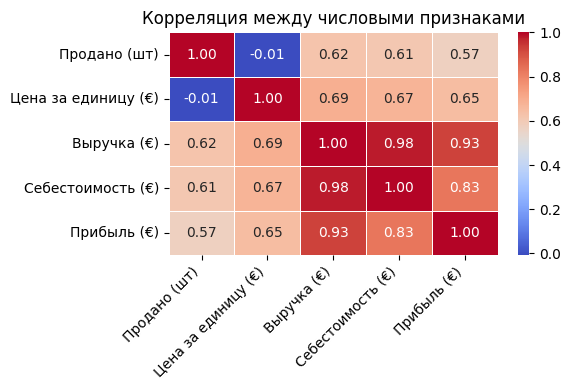

In [ ]:
# Создание корреляции
df_rus = df.rename(columns={'units_sold': 'Продано (шт)','unit_price': 'Цена за единицу (€)','revenue': 'Выручка (€)','cost': 'Себестоимость (€)','profit': 'Прибыль (€)'})

numeric_cols_rus = ['Продано (шт)', 'Цена за единицу (€)', 'Выручка (€)', 'Себестоимость (€)', 'Прибыль (€)']
corr_matrix_rus = df_rus[numeric_cols_rus].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_rus, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляция между числовыми признаками', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Наблюдения:**

**Выручка:**

Сильно положительно коррелирует с **себестоимостью** (0.98) и **прибылью**  (0.93). Это логично: чем выше доход, тем выше прибыль. Также коррелирует с:

- **Ценой за единицу**: 0.69

- **Проданным количеством** (шт): 0.62

**Прибыль:**

Сильно связана с **выручкой** (0.93) и **себестоимостью **(0.83), а также умеренно с **ценой за единицу**: 0.65 и **продано** (шт): 0.57

**Цена за единицу** не зависит от **количества продаж** (корреляция -0.01), но при этом показывает умеренную положительную связь с остальными показателями:

- С **выручкой** (0.69)

- С **прибылью** (0.65)

- С **себестоимостью** (0.67)

**Количество проданных единиц** (шт):

Наиболее сильно связано с **выручкой** (0.62) и **себестоимостью** (0.61), но не влияет на **цену за единицу** (–0.01).

**Вывод:**

**Выручка** и **прибыль** сильно зависят от себестоимости — рост продаж ведёт к росту затрат, но и прибыли. Также выручка растёт как за счёт увеличения цены, так и количества продаж.

**Цена за единицу** не влияет на **объём продаж** (корреляция ~0), но влияет на прибыль — значит, ценовая стратегия важна.

**Объём продаж** влияет на **выручку**, но сам по себе не гарантирует прибыль — важны цена и затраты.


## Итоговый вывод по анализу продаж за 2024 год

Анализ данных позволил выявить важные закономерности в сезонности, прибыльности категорий и каналов продаж, а также во взаимосвязи ключевых показателей:

**Сезонность и динамика**

Пик продаж пришёлся на **май** — максимальные показатели по выручке (152 тыс. евро), прибыли (54 тыс. евро) и количеству проданных единиц (597 единиц).

**Высокие продажи** также наблюдались в **апреле**, **августе** и **октябре**.

**Наименьшая активность** — в **январе**, **марте** и **ноябре**.

Средний чек и маржинальность не всегда движутся синхронно с выручкой, что указывает на изменение состава корзины или ценовой политики в разные месяцы.

**Категории товаров**

- **Clothing** (Одежда) — лидер по выручке и объёму продаж, приносит стабильную прибыль.

- **Books** (Книги) — самая рентабельная категория с маржой 36.8%; обеспечивает высокую прибыль при умеренной выручке.

- **Beauty** (Косметика) — массовая категория с высоким объёмом, но меньшей рентабельностью.

- **Electronics/Home** — отстают по всем показателям и могут требовать стратегического пересмотра.


**Каналы продаж**

**Онлайн-канал** обеспечивает **69% выручки** и в 2.2 раза больше прибыли, чем розничный.

Однако **розничный канал** показывает **высшую маржу (36.2%**) и средний чек, что делает его важным для общей прибыльности бизнеса.

**Рекомендация:** укреплять онлайн-продажи как основной драйвер роста, но также развивать и оптимизировать розницу как устойчивый источник прибыли.

**Финансовые взаимосвязи**

**Выручка** и **прибыль** сильно коррелируют с **себестоимостью** — при росте продаж растут и затраты.

**Цена за единицу** не влияет на **объём продаж**, но влияет на **прибыль** — следовательно, ценовая политика критически важна.

**Количество продаж** влияет на **выручку**, но не гарантирует прибыль — важно контролировать себестоимость и наценку.

 **Вывод**

В 2024 году бизнес демонстрировал стабильную активность с ярко выраженными сезонными пиками продаж. Наиболее прибыльными направлениями оказались категория **Books** и **онлайн-продажи**. Поведение среднего чека и маржинальности в течение года указывает на необходимость адаптивной ценовой и промостратегии.

**Для дальнейшего роста выручки и оптимизации расходов стоит:**

- Активнее работать с сезонностью (акции в спаде, усиление в пике),

- Продолжать развивать **онлайн-продажи**,

- Укреплять эффективные категории (**Books**, **Clothing**),
- И минимизировать издержки в менее прибыльных сегментах.

